# Import and Construct Dataset

In [55]:
# Import
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# Construct Data
root_dir: str = "data//"
file_ext: str = ".csv"
delimiter: str = ","


def get_path(file_name: str) -> str:
    return root_dir + file_name + file_ext


def save_csv(file_name, data: np.ndarray, delimiter):
    frame = pd.DataFrame(data)
    frame.to_csv(get_path(file_name), index=False, sep=delimiter,
                 float_format="%.17f")


def read_csv(file_name, delimiter) -> np.ndarray:
    df = pd.read_csv(get_path(file_name), delimiter=delimiter, float_precision="round_trip")
    if df.values.shape[1] == 1:
        return df.values.T
    return df.values


def construct_dataset():
    m = 150  # data rows
    d = 75  # feature dimensions
    X: np.ndarray = np.random.rand(m, d)

    theta = np.zeros(shape=(d, 1))

    theta[:10] = np.array([10 if np.random.randint(0, 2) == 0 else -10 for _ in range(10)]).reshape((10, 1))

    epsilon = np.random.normal(loc=0, scale=0.1, size=(m, 1))

    y: np.ndarray = np.dot(X, theta) + epsilon

    save_csv("X_train", X[:80], delimiter=delimiter)
    save_csv("X_validation", X[80:100], delimiter=delimiter)
    save_csv("X_test", X[100:], delimiter=delimiter)
    save_csv("Y_train", y[:80], delimiter=delimiter)
    save_csv("Y_validation", y[80:100], delimiter=delimiter)
    save_csv("Y_test", y[100:], delimiter=delimiter)

In [35]:
# Reload data
construct_dataset()
X_train: np.ndarray = read_csv("X_train", delimiter=delimiter)
X_valid: np.ndarray = read_csv("X_validation", delimiter=delimiter)
X_test: np.ndarray = read_csv("X_test", delimiter=delimiter)
y_train: np.ndarray = read_csv("Y_train", delimiter=delimiter)
y_valid: np.ndarray = read_csv("Y_validation", delimiter=delimiter)
y_test: np.ndarray = read_csv("Y_test", delimiter=delimiter)

# Ridge Regression

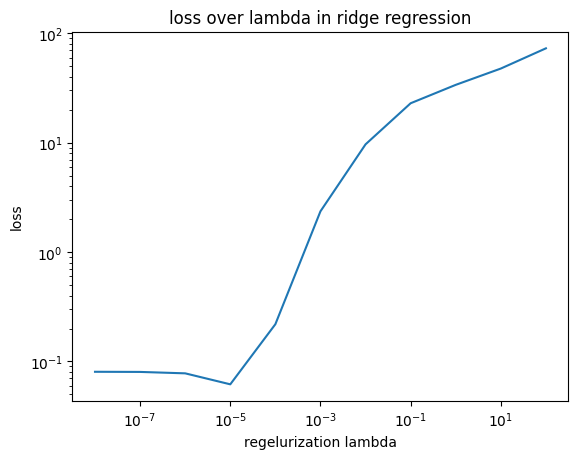

Choose lambda: 1e-05 		 min loss: 0.061818419883535085
True zero component number is 0, component smaller than 0.001 is 35, over 75 component
----------------
final theta by ridge regression is: 
 [ 10.12521167   9.98351847 -10.15976627 -10.14796618  10.12791165
   9.98988398  -9.87810673  10.04505122  -9.89277448   9.82647869
   0.02091506   0.05152092   0.1813393   -0.20819706   0.05568955
  -0.14819132  -0.11307763   0.26126133   0.17738899   0.17189129
  -0.19193747  -0.13859146   0.1279752    0.10413599  -0.03437464
  -0.04226624   0.01625624   0.05949321  -0.03806986   0.18433634
   0.06637599   0.15158149  -0.12918832  -0.03763936  -0.09862487
   0.0440002   -0.07150776  -0.16359089  -0.08687934  -0.16053254
   0.09155155  -0.15180959  -0.20004666   0.15293425   0.0443909
  -0.12333645   0.02937294   0.04373406   0.16994614  -0.09850967
   0.33022742  -0.15122265   0.02353993   0.06604661   0.06290828
  -0.22045979  -0.05772818  -0.08044257   0.02704505  -0.06373229
  -0.2184555

In [58]:
def ridge_regression_test():
    num_train_record, num_feature = X_train.shape
    num_test_record = X_test.shape[0]

    def ridge(Lambda):
        def ridge_obj(obj_theta):
            return ((np.linalg.norm(np.dot(X_train, obj_theta) - y_train)) ** 2) \
                   / (2 * num_train_record) + Lambda * (np.linalg.norm(obj_theta)) ** 2

        return ridge_obj

    def compute_loss(theta):
        return ((np.linalg.norm(np.dot(X_test, theta) - y_test)) ** 2) / (2 * num_test_record)

    w = np.random.rand(num_feature)

    min_lambda = 0
    min_loss = 1e100
    optimized_theta: np.ndarray
    lambda_list = []
    loss_list = []
    for i in range(-8, 3):
        Lambda = 10 ** i
        w_opt = minimize(ridge(Lambda), w)
        loss = compute_loss(w_opt.x)
        if loss < min_loss:
            min_loss = loss
            optimized_theta = w_opt.x
            min_lambda = Lambda
        lambda_list.append(Lambda)
        loss_list.append(loss)

    plt.plot(lambda_list, loss_list)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("regelurization lambda")
    plt.ylabel("loss")
    plt.title("loss over lambda in ridge regression")
    plt.show()

    print("Choose lambda: {0} \t\t min loss: {1}".format(min_lambda, min_loss))

    true_zero_count = 0
    thresh_hold = 1e-3
    small_count = 0
    for ele in optimized_theta:
        if ele == 0:
            true_zero_count = true_zero_count + 1
        elif ele <= thresh_hold:
            small_count = small_count + 1
    print("True zero component number is {0}, "
          "component smaller than {1} is {2}, "
          "over {3} component"
          .format(true_zero_count,
                  thresh_hold,
                  small_count,
                  optimized_theta.shape[0]))

    print("----------------")
    print("final theta by ridge regression is: \n", optimized_theta)


ridge_regression_test()